In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 29 15:33:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_153.jpg')

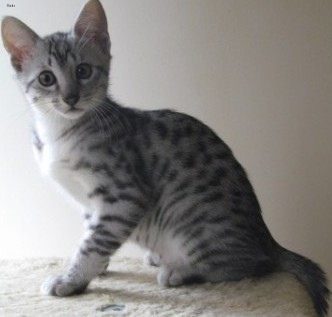

In [7]:
im = Image.open("/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_153.jpg")
im

In [8]:
files[7]

Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_127.jpg')

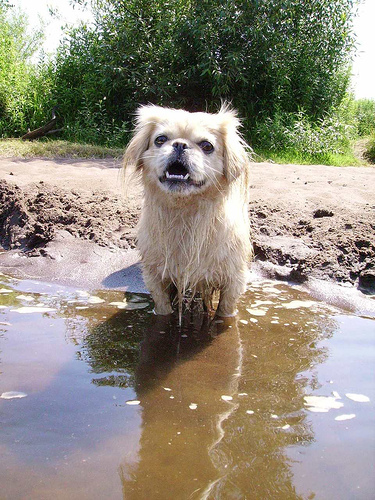

In [9]:
im2 = Image.open("/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_127.jpg")
im2

In [10]:
def is_cat(x): return x[0].isupper() 

In [11]:
dls = ImageDataLoaders.from_name_func(
    path,
    files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    label_func=is_cat, 
    item_tfms=Resize(192))

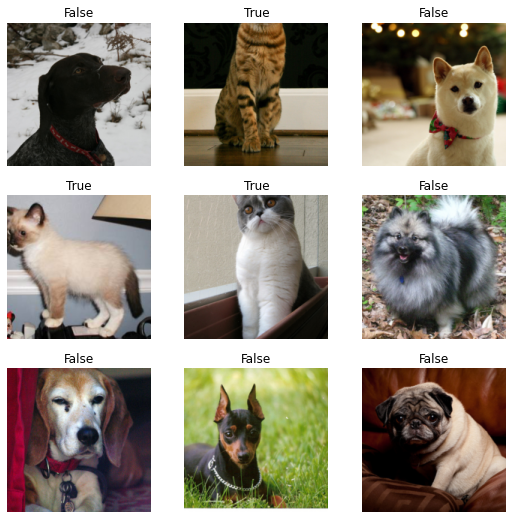

In [12]:
dls.show_batch()

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

In [15]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([1.2732e-09, 1.0000e+00]))

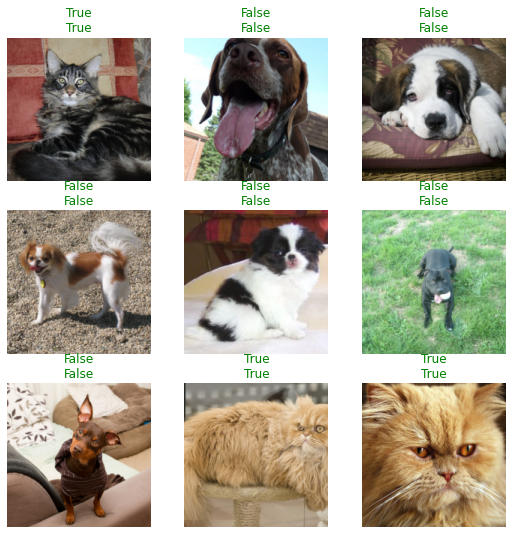

In [16]:
learn.show_results()

In [17]:
learn.path = Path('.')
learn.export('model.pkl')